# CSI 5140 — Homework 2

## Samantha Bracellari

### Question 1

There are two Jupyter notebooks posted on Moodle. There notebooks contain code for training a two layer neural network; one notebook is based only on numpy while the other one uses torch's autograd feature to compute gradients. The input is a two-dimensional feature vector and the desired output is coded as a one-hot vector.

- First, play with a few learning rates over the range of 0.1 to 0.1e-8. Then perform an experiment by selecting three learning rates and generate plots showing how loss goes down with training.
- Pick the best learning rate found in the previous step and change the number of hidden layer neurons to 20, 30, 40, and 50. Plot the accuracy vs hidden layer size.
- Next, replace the ReLU function with sigmoidal units and repeat the above steps.

#### Part 1 — Learning Rates & Loss

##### PyTorch Autograd

I choose 0.01, 0.00001, and 0.00000001 as my three learning rates.

<!-- | learning rate: 0.01 | learning rate: 0.00001 | learning rate: 0.00000001 |
|:-------------------:|:----------------------:|:-------------------------:|
|![ag1](ag1.png)      |![ag2](ag2.png)         |![ag3](ag3.png)            | -->

Learning rate: 0.01

![ag1](img/ag1.png)

Learning rate: 0.00001

![ag2](img/ag2.png)

Learning rate: 0.00000001

![ag3](img/ag3.png)

As you can see, autograd does not perform well at all with larger learning rates. However, I noticed that from 0.001-0.0000001, the performance was very good. It seems like, once you hit that sweet spot for learning rates, autograd performs extremely well. I did notice, however, that once the rate got very small, the performance took a small hit. But it was still good overall.

##### Neural Net Model

I chose 0.1, 0.01, and 0.001 as my three learning rates.

<!-- | learning rate: 0.1 | learning rate: 0.01 | learning rate: 0.0001 |
|:------------------:|:-----------------------:|:-------------------------:|
|![nn1](nn1.png)     |![nn2](nn2.png)          |![nn3](nn3.png)            | -->

Learning rate: 0.1

![nn1](img/nn1.png)

Learning rate: 0.01

![nn2](img/nn2.png)

Learning rate: 0.001

![nn3](img/nn3.png)

The neural net model performed extremely well with a learning rate of 0.1. As learning rate decreased, the model became less and less performant. From this small experiment, it seems like the neural not model prefers larger learning rates, whereas autograd prefers smaller ones (to an extent). The neural net model also seems much more sensitive to changes in the learning rate when compared to autograd.

#### Part 2 — Hidden Layer Size & Accuracy

From the above experiment, I decided that 0.00001 was the best rate for autograd, and 0.1 was the best for the neural net. With those rates locked in place, here is how the model accuracy changed as the size of the hidden layer changed.

<!-- | PyTorch autograd (alpha = 0.00001)| neural net model (alpha = 0.1)|
|:----------------------------------:|:-----------------------------:|
|![ag4](ag4.png)               |![nn4](nn4.png)                | -->

### PyTorch Autograd

The learning rate is 0.00001.

![ag4](img/ag4.png)

### Neural Net Model 

The learning rate is 0.1.

![nn4](img/nn4.png) 

Both models were extremely consistent in accuracy despite the change in hidden layer size. This leads me to believe that learning rate is much more important when it comes to multi layer networks than the size of the network itself.

##### Part 3 — Sigmoidal Units, Learning Rates, & Loss

##### PyTorch Autograd

I continued with the same learning rates as before.

<!-- | learning rate: 0.01      | learning rate: 0.00001   | learning rate: 0.00000001 |
|:-------------------------:|:-------------------------:|:-------------------------:|
|![ag5](ag5.png)|![ag6](ag6.png)|![ag7](ag7.png)| -->


Learning rate: 0.01

![ag5](img/ag5.png)

Learning rate: 0.00001

![ag6](img/ag6.png)

Learning rate: 0.00000001

![ag7](img/ag7.png)

We achieve similar results as we did with Relu activation. There seems to be a sweet spot between 0.001-0.0000001 where the model performance is extremely good.

##### Neural Net Model

I continued with the same learning rates as before.

<!-- | learning rate: 0.001 | learning rate: 0.000001 | learning rate: 0.00000001 |
|:--------------------:|:-----------------------:|:-------------------------:|
|![nn5](nn5.png)       |![nn6](nn6.png)          |![nn7](nn7.png)            | -->

Learning rate: 0.1

![nn5](img/nn5.png)

Learning rate: 0.01

![nn6](img/nn6.png)

Learning rate: 0.001

![nn7](img/nn7.png)

The neural net model struggled a lot more with sigmoidal activation than it did with Relu. The trend is still the same, though - the model performed best at a rate of 0.1 and got worse as the rate decreased.

##### Part 4 — Sigmoidal Units, Hidden Layer Size, & Accuracy

<!-- | PyTorch autograd (alpha = 0.00001) | neural net model (alpha = 0.1) |
|:-------------------------:|:----------------:|
|![ag8](ag8.png)|![nn8](nn8.png)   | -->

### PyTorch Autograd

The learning rate is 0.00001.

![ag8](img/ag8.png)

### Neural Net Model 

The learning rate is 0.1.

![nn8](img/nn8.png) 

While both models were still consistent in their accuracies, they were much lower this time, dropping from high 90s to 50s for autograd and 30s for the neural net. This leads me to believe that the original choice in activation function, Relu, was a much better one.

Looking at the results as a whole, it seems that autograd is much more robust than a neural net from scratch. It is much less sensitive to changes in learning rate, and still achieved OK accuracies with an unsuitable activation function. The neural net from scratch was much more picky about the chosen learning rate, and accuracy suffered greatly with a poor choice in activation function. Both models seemed to be insensitive to hidden layer size modifications.


-----

### Question 2

For the second exercise, you will generate 150 examples, each from two classes as per the picture shown below and train a two-layer sigmoidal network to obtain the best accuracy that you can achieve with the fewest hidden units.

![q2](img/q2.png)

#### Part 1 — Data Generation

Manually generate data in the correct shape. Plot the data.

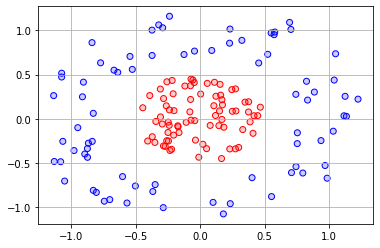

In [72]:
import numpy as np
from random import random, uniform
from math import sqrt, sin, cos, pi
from matplotlib import pyplot as plt

A, B = [], []

for i in range(75):
    theta = random()*2*pi
    ra, rb = 0.5*sqrt(random()), 5*sqrt(random())
    A.append([ra*cos(theta), ra*sin(theta)])
    B.append([uniform(-0.25, 0.25)+cos(theta), uniform(-0.25, 0.25)+sin(theta)])

# combine & add classes
A = np.hstack((np.array(A), np.zeros((75,1))))
B = np.hstack((np.array(B), np.ones((75,1))))

data = np.vstack((A, B))
np.random.shuffle(data)

X = data[:, :2]
y = (data[:, -1]).astype(int)

# defining colors so things look prettier
colors = [(1,0,0,0.2) if item == 0 else (0,0,1,0.2) for item in y]
edges = ['red' if item == 0 else 'blue' for item in y]

plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor=edges)
plt.grid()
plt.show()

#### Part 2 — Data Initialization

Initialize any variables needed for gradient descent. We also define the sigmoid activation function

In [73]:
K = 2 # number of classes
D = 2 # dimensionality
h = 100 # size of hidden layer

# initial weights & biases
W1 =  0.1 * np.random.randn(D,h)
W2 = 0.01 * np.random.randn(h,K)
b1 = np.zeros((1,h))
b2 = np.zeros((1,K))

alpha = 0.1 # learning rate
reg = 1e-3 # regularization strength
n = X.shape[0] # number of examples
losses = [] # to keep track of loss
 
def sigmoid(X):
  return 1/(1+np.exp(-X))

#### Part 3 — Gradient Descent

Perform gradient descent. We also keep track of loss.

Text(0.5, 1.0, 'loss over time')

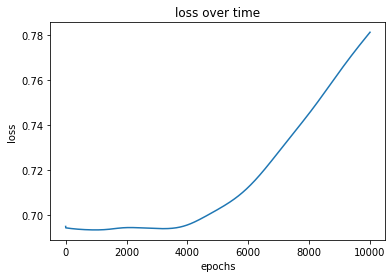

In [74]:
# gradient descent loop
for i in range(10000):
  
  # evaluate class scores
  hidden_layer = sigmoid((np.dot(X, W1) + b1))
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  p = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss
  data_loss = np.sum(-np.log(p[range(n),y]))/n
  reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  losses.append(loss)
  
  # compute the gradient on scores
  d_scores = p
  d_scores[range(n),y] -= 1
  d_scores /= n
  
  # backpropate the gradient to the parameters
  dW2 = np.dot(hidden_layer.T, d_scores)
  db2 = np.sum(d_scores, axis=0, keepdims=True)
  d_hidden = np.dot(d_scores, W2.T)
  d_hidden = np.dot(
    np.dot(d_hidden.T, sigmoid(X)), (1-sigmoid(X)).T).T
  dW1 = np.dot(X.T, d_hidden)
  db1 = np.sum(d_hidden, axis=0, keepdims=True)
  
  # add regularization
  dW2 += reg * W2
  dW1 += reg * W1
  
  # update weights
  W1 += -alpha * dW1
  b1 += -alpha * db1
  W2 += -alpha * dW2
  b2 += -alpha * db2

plt.plot([i for i in range(10000)], losses)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('loss over time')

#### Part 4 — Model Accuracy

Take a look at the training accuracy of the model.

In [75]:
hidden_layer = sigmoid(np.dot(X, W1) + b1)

scores = np.dot(hidden_layer, W2) + b2
y_pred = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

training accuracy: 0.60


#### Part 5 — Plot Classifier

Let's look at how the model performed visually.

(-2.074111758718239, 2.145888241281765)

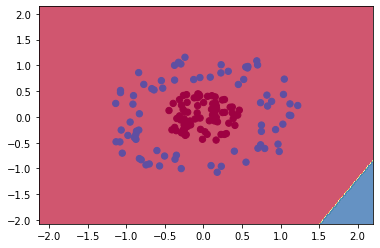

In [76]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(
    np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#### Part 6 — Discussion

For some reason, I wasn't able to achieve accuracy higher than 60%. I stuck with my model parameters from number 1 (learning rate of 0.1 and hidden layer size of 100), and even with a high number of iterations, my accuracy remained around 50-60%. After evaluating the results for number 1, I have a feeling this is due mostly to the chosen activation function. Relu seems to be a bit more robust than sigmoid when it comes to neural nets from scratch, and since we're using sigmoid here, our results are going to reflect that.

----- 

### Question 3

Consider the network of neurons shown below. With the current input and weights as shown, determine the output of the network. Assume sigmoidal activation function. With the specified target output of "1", determine the values of the updated weights for the connections linking *U3* and *U5*, and *U3* and *U1*. This should be done using the autograd feature of PyTorch.

![q3](img/q3.png)

#### Part 1 — Data Initialization

Define the input, expected output, weights, and biases.

In [40]:
import torch 
import numpy as np 
dtype = torch.float

x = torch.from_numpy(np.array([[1, 0]])).float()
y = torch.from_numpy(np.array([[1]])).float()

w3 = torch.tensor([[3, 4]], dtype=dtype, requires_grad=True) # u3
w4 = torch.tensor([[6, 5]], dtype=dtype, requires_grad=True) # u4
w5 = torch.tensor([[2, 4]], dtype=dtype, requires_grad=True) # u5

b1, b2, b3 = 1, -6, -3.93

#### Part 2 — Define the Network

We will use sigmoidal activation. Torch has a built-in sigmoid function that we will take advantage of.

In [41]:
def mlp(X):
    h3 = torch.sigmoid(X@w3.T + b1) # output of u3 (hidden layer)
    h4 = torch.sigmoid(X@w4.T + b2) # output of u4 (hidden layer)
    h = torch.cat((h3, h4), 0)
    output = torch.sigmoid(h.T@w5.T + b3) # output of network
    return output

#### Part 3 — Train the Network

Perform the forward pass manually. The backward pass is taken care of by Torch.

In [53]:
alpha = 0.5 # learning rate

for epoch in range(2000):
    y_pred = mlp(x) # get the predicted value 
    loss = (y_pred - y).pow(2).sum() # calculate loss

    # perform backpropagation. calling backward() will
    # calculate gradients of any tensors that have the
    # requires_grad=True property
    loss.backward()
    with torch.no_grad():
        # update weights and reset the gradient
        w3 -= alpha * w3.grad
        w4 -= alpha * w4.grad
        w5 -= alpha * w5.grad
        w3.grad.zero_()
        w4.grad.zero_()
        w5.grad.zero_()

#### Part 4 — Results

Take a look at the updated weights and predicted output.

In [58]:
print('output with updated weights:', mlp(x).item())

print('\nnew weight from u1 to u3:', w3[0][0].item())
print('new weight from u3 to u5:', w5[0][0].item())


output with updated weights: 0.9921031594276428

new weight from u1 to u3: 3.1070001125335693
new weight from u3 to u5: 4.069584369659424


#### Part 5 — Discussion

The autograd model was able to achieve a very accurate prediction given a learning rate of 0.5 and 2000 iterations. Even at about 100 iterations, I was still achieving a predicted output of about 0.95, which is still very close. I experimented with decreasing the learning rate and keeping the number of epochs the same, but that reduced the accuracy of the model significantly. Normally, I'm used to using small learning rates, however it seems this model worked well with a larger one. 